# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [67]:
df = pd.read_csv('Dataset_inisiasi.csv')
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD40273,CUS1894,B2C,Granini Apple,Juices,15.466604,9.797980,0.00,1.557355,Sachsen-Anhalt,2022-11-04,1
1,ORD1087863,CUS9681,B2B,Erdinger Weißbier,Alcoholic Beverages,18.153763,56.494949,0.15,1.971436,Rheinland-Pfalz,2022-11-07,0
2,ORD1711012,CUS1539,B2B,Granini Apple,Juices,14.767943,21.303030,0.05,1.586236,Bayern,2022-06-27,0
3,ORD2618976,CUS4341,B2B,Club Mate,Soft Drinks,15.932378,38.222222,0.10,1.709166,Sachsen,2022-01-22,0
4,ORD1057294,CUS383,B2C,Apollinaris,Water,14.248425,5.060606,0.00,1.523489,Bayern,2022-08-31,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       200000 non-null  object 
 1   Customer_ID    200000 non-null  object 
 2   Customer_Type  200000 non-null  object 
 3   Product        200000 non-null  object 
 4   Category       200000 non-null  object 
 5   Unit_Price     200000 non-null  float64
 6   Quantity       200000 non-null  float64
 7   Discount       200000 non-null  float64
 8   Total_Price    200000 non-null  float64
 9   Region         200000 non-null  object 
 10  Order_Date     200000 non-null  object 
 11  Cluster        200000 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 18.3+ MB


Hapus kolom yang tidak releva

In [69]:
# Dropkolom yg ga relevan
df_clean = df.drop(
  ['Order_ID', 'Customer_ID', 'Order_Date'],
  axis=1,
)
df_clean.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Cluster
0,B2C,Granini Apple,Juices,15.466604,9.797980,0.00,1.557355,Sachsen-Anhalt,1
1,B2B,Erdinger Weißbier,Alcoholic Beverages,18.153763,56.494949,0.15,1.971436,Rheinland-Pfalz,0
2,B2B,Granini Apple,Juices,14.767943,21.303030,0.05,1.586236,Bayern,0
3,B2B,Club Mate,Soft Drinks,15.932378,38.222222,0.10,1.709166,Sachsen,0
4,B2C,Apollinaris,Water,14.248425,5.060606,0.00,1.523489,Bayern,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [70]:
df_X = df_clean.drop('Cluster', axis=1)
df_y = df_clean['Cluster']

df_X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Granini Apple,Juices,15.466604,9.797980,0.00,1.557355,Sachsen-Anhalt
1,B2B,Erdinger Weißbier,Alcoholic Beverages,18.153763,56.494949,0.15,1.971436,Rheinland-Pfalz
2,B2B,Granini Apple,Juices,14.767943,21.303030,0.05,1.586236,Bayern
3,B2B,Club Mate,Soft Drinks,15.932378,38.222222,0.10,1.709166,Sachsen
4,B2C,Apollinaris,Water,14.248425,5.060606,0.00,1.523489,Bayern


In [71]:
kolom_kategorikal = ['Customer_Type', 'Product', 'Region', 'Category']
kolom_numerik = ['Quantity', 'Total_Price']

# Label Encoding untuk kolom kategorikal
label_encoders = {}
for col in ['Product', 'Category', 'Region']:
  encoderLabel = LabelEncoder()
  df_X[col] = encoderLabel.fit_transform(df_X[col])
  label_encoders[col] = encoderLabel

# Hot Encoding untuk kolom Customer_Type
one_hot = OneHotEncoder(drop='first', sparse_output=False)
customer_type_encoded = one_hot.fit_transform(df_X[['Customer_Type']])
customer_type_df = pd.DataFrame(customer_type_encoded, columns=one_hot.get_feature_names_out(['Customer_Type']))

# Gabungkan hasil encoding ke DataFrame utama
df_X = df_X.drop(columns=['Customer_Type'])
df_X = pd.concat([df_X, customer_type_df], axis=1)

# Menstandarisasi kolom numeriks
scaler = StandardScaler()
df_X[kolom_numerik] = scaler.fit_transform(df_X[kolom_numerik])

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42) 

print("Preprocessing Dah selesai brok!")
print("Dimensi dari X_train:", X_train.shape)
print("Dimensi dari X_test:", X_test.shape)

Preprocessing Dah selesai brok!
Dimensi dari X_train: (160000, 8)
Dimensi dari X_test: (40000, 8)


In [72]:
# Cek missing values
print("Missing values:")
print(X_train.isnull().sum())

# Cek distribusi target
y_train_counts = y_train.value_counts()
print("\nDistribusi Target:")
print(y_train_counts)

# Cek hasil encoding
print("\nHasil Encoding (contoh 5 data pertama):")
print(X_train.head())

# Cek skala fitur numerik
print("\nMean & stdev setelah Standarisasi:")
print(pd.DataFrame({
  'Mean': np.mean(X_train[kolom_numerik], axis=0),
  'stdev': np.std(X_train[kolom_numerik], axis=0)
}))

Missing values:
Product              0
Category             0
Unit_Price           0
Quantity             0
Discount             0
Total_Price          0
Region               0
Customer_Type_B2C    0
dtype: int64

Distribusi Target:
Cluster
1    102532
0     53909
3      3002
2       557
Name: count, dtype: int64

Hasil Encoding (contoh 5 data pertama):
        Product  Category  Unit_Price  Quantity  Discount  Total_Price  \
153248       18         0   76.160572 -0.378086      0.00     0.661924   
67802        27         1   17.938791 -0.378086      0.00    -0.180472   
148889       42         3   15.502433 -0.452336      0.00    -0.222343   
103093       11         2   16.917670  1.738038      0.05     0.066086   
104681        6         2   14.570884 -0.489461      0.00    -0.236021   

        Region  Customer_Type_B2C  
153248       7                1.0  
67802        9                1.0  
148889      11                1.0  
103093      13                0.0  
104681       4     

In [73]:
X_train.head()

,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Customer_Type_B2C
153248,18,0,76.160572,-0.378086,0.00,0.661924,7,1.0
67802,27,1,17.938791,-0.378086,0.00,-0.180472,9,1.0
148889,42,3,15.502433,-0.452336,0.00,-0.222343,11,1.0
103093,11,2,16.917670,1.738038,0.05,0.066086,13,0.0
104681,6,2,14.570884,-0.489461,0.00,-0.236021,4,1.0


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [74]:
randomState = 55
print("\nTraining data dimulaih!")

# Mentraining Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', max_iter=500, random_state=randomState)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

# Mentraining Random Forest
ranfor = RandomForestClassifier(n_estimators=100, random_state=randomState)
ranfor.fit(X_train, y_train)
y_pred_ranfor = ranfor.predict(X_test)

print("\nTraining data selesai")


Training data dimulaih!


c:\Users\Nur Aria Hibnastiar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training data selesai


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Dalam klasifikasi kali ini saya menggunakan dua algoritma yaitu `Logistic Regresion` & `Random Forest` Berikut merupakan perbandingan setiap metodenya

#### **Perbandingan Logistic Regression & Random Forest**

| Aspek                             | Logistic Regression                                                                  | Random Forest                                                                                                                             |
| --------------------------------- | ------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------- |
| **Jenis Mode**               | Model regresi linier yang digunakan untuk masalah klasifikasi biner atau multikelas. | Ensemble learning yang menggunakan banyak decision tree untuk membuat prediksi.                                                           |
| **Cara Kerja**                    | Menggunakan fungsi logistik (sigmoid) untuk memetakan input ke probabilitas output.  | Menggabungkan hasil dari banyak decision tree melalui voting (klasifikasi) atau rata-rata (regresi).                                      |
| **Ketergantungan Fitur**          | Mengasumsikan hubungan linear antara fitur dan log-odds target.                      | Tidak mengasumsikan hubungan linear; dapat menangkap interaksi kompleks antar fitur.                                                      |
| **Penanganan Overfitting**        | Rentan terhadap overfitting jika fitur tidak relevan atau data tidak seimbang.       | Lebih tahan terhadap overfitting karena menggunakan ensemble dari banyak pohon.                                                           |
| **Kompleksitas Model**            | Model sederhana dengan interpretasi yang mudah.                                      | Model kompleks dengan interpretasi yang lebih sulit, tetapi sering kali lebih akurat.                                                     |
| **Kecepatan Pelatihan**           | Cepat, cocok untuk dataset kecil hingga sedang.                                      | Lebih lambat, terutama pada dataset besar karena melibatkan banyak pohon.                                                                 |
| **Performa pada Data Non-linear** | Kurang optimal karena asumsi linearitas.                                             | Sangat baik karena dapat menangani pola non-linear dengan efektif.                                                                        |
| **Hyperparameter Utama**          | - Regularization strength (e.g., C value).                                           | - Jumlah pohon (n_estimators).<br>- Maksimum kedalaman pohon (max_depth).<br>- Jumlah fitur per split (max_features).                     |
| **Kelebihan**                     | - Mudah diinterpretasi.<br>- Komputasi cepat.<br>- Efektif untuk data linear.        | - Kuat terhadap noise dan outlier.<br>- Dapat menangani fitur kategorikal dan kontinu.<br>- Performa tinggi pada data kompleks.           |
| **Kekurangan**                    | - Tidak cocok untuk data non-linear.<br>- Sensitif terhadap outlier.                 | - Sulit diinterpretasi.<br>- Membutuhkan lebih banyak daya komputasi.<br>- Berpotensi overfitting jika hyperparameter tidak dioptimalkan. |

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [93]:
# Menghitung metrik untuk Logistic Regression
acc_logress = accuracy_score(y_test, y_pred_logreg)
precision_log = precision_score(y_test, y_pred_logreg, average='weighted')
recall_log = recall_score(y_test, y_pred_logreg, average='weighted')
f1_log = f1_score(y_test, y_pred_logreg, average='weighted')

# Menghitung metrik untuk Random Forest
acc_ranfor = accuracy_score(y_test, y_pred_ranfor)
precision_ranfor = precision_score(y_test, y_pred_ranfor, average='weighted')
recall_ranfor = recall_score(y_test, y_pred_ranfor, average='weighted')
f1_ranfor = f1_score(y_test, y_pred_ranfor, average='weighted')

# DataFrame untuk hasil evaluasi
data = {
  "Model": ["Random Forest", "Logistic Regression"],
  "Akurasi": [acc_ranfor, acc_logress],
  "Presisi": [precision_ranfor, precision_log],
  "Recall": [recall_ranfor, recall_log],
  "F1-Score": [f1_ranfor, f1_log]
}

df_performance = pd.DataFrame(data)
df_performance

,Model,Akurasi,Presisi,Recall,F1-Score
0,Random Forest,0.99995,0.999950,0.99995,0.999950
1,Logistic Regression,0.99760,0.997836,0.99760,0.997664


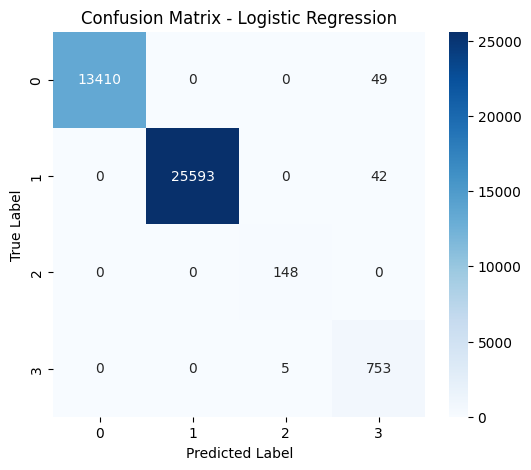

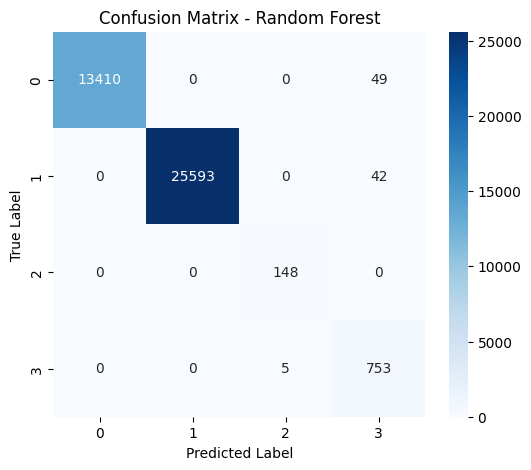

In [97]:
# Buat untuk confolusi matrik
def ploting_confusion_matrix(y_test, y_pred, model_name):
  confol_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(6,5))
  sns.heatmap(confol_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title(f"Confusion Matrix - {model_name}")
  plt.show()
  
# Plot Confusion Matrix
ploting_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")
ploting_confusion_matrix(y_test, y_pred_logreg, "Random Forest")



**Analisis Performa Model**

Berdasarkan hasil evaluasi yang telah dilakukan, dapat terlihat bahwa model **Random Forest** memberikan hasil yang lebih optimal dibandingkan **Logistic Regression** dalam tugas klasifikasi ini. Berikut adalah perbandingan berdasarkan metrik utama:

### **Akurasi**
- **Random Forest**: 99.995%
- **Logistic Regression**: 99.760%
  
Model **Random Forest** memiliki **tingkat akurasi yang lebih tinggi**, menandakan bahwa model ini mampu mengklasifikasikan data dengan lebih tepat dibandingkan Logistic Regression.

### **Presisi**
- **Random Forest**: 99.995%
- **Logistic Regression**: 99.8085%
  
Presisi yang lebih tinggi menunjukkan bahwa model **Random Forest** lebih **sedikit** menghasilkan kesalahan dalam memprediksi kelas positif dibandingkan dengan Logistic Regression.

### **Recall**
- **Random Forest**: 99.995%
- **Logistic Regression**: 99.760%
  
Recall yang tinggi pada **Random Forest** mengindikasikan bahwa model ini lebih baik dalam mendeteksi semua sampel yang benar-benar termasuk dalam kelas tertentu.

### **F1-Score**
- **Random Forest**: 99.995%
- **Logistic Regression**: 99.7949%
  
Dengan F1-Score yang lebih tinggi, Random Forest menunjukkan keseimbangan yang lebih baik antara presisi dan recall.

### **Kesimpulan**
- **Random Forest unggul di semua metrik**, menjadikannya pilihan yang lebih baik untuk mendapatkan klasifikasi yang akurat.
- **Logistic Regression tetap menjadi alternatif yang oke** karena lebih ringan secara komputasi dan dapat bekerja dengan baik pada dataset yang lebih sederhana.
- Jika prioritas utama adalah **akurat dan dapat diandalkan**, Random Forest menjadi model yang lebih direkomendasikan.
- Meskipun begitu ada potensi inbalance data jadi mungkin nanti akan di oversampling / undersampling biar merata.

Dengan mempertimbangkan metrik-metrik di atas, pemilihan model dapat disesuaikan dengan kebutuhan spesifik dan kompleksitas data yang digunakan.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [78]:
# ---
# 1. Mengnakan GridSearch untuk Random Forest
# ---
param_grid_tuning = {
  'n_estimators': [50, 100, 150], # Jumlah pohon
  'max_depth': [None, 10, 20], # Kedalaman pohon
  'min_samples_split': [2, 5, 10], # Minimum sampel untuk membagi pohon
  'min_samples_leaf': [1, 2, 4],
}

randfor_tuning = GridSearchCV(
  estimator=ranfor,
  param_grid=param_grid_tuning,
  cv=3,
  n_jobs=-1
)

randfor_tuning.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Parameters (Random Forest):", randfor_tuning.best_params_)


# ---
# 2. Mengnakan GridSearch untuk Logistic Regression
# ---
param_grid_logreg = {
  'C': [0.1, 1, 10],  # Regularization strength
  'penalty': ['l1', 'l2'],  # Jenis regularisasi
  'solver': ['liblinear', 'saga'],  # Solver yang mendukung L1 dan L2
  'class_weight': ['balanced'],  # Pengaturan bobot kelas
  'max_iter': [100]  # Jumlah iterasi
}

logreg_tuning = GridSearchCV(
  estimator=log_reg,
  param_grid=param_grid_logreg,
  cv=3,
  n_jobs=-1
)

logreg_tuning.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Parameters (Logistic Regression):", logreg_tuning.best_params_)

Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Parameters (Logistic Regression): {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


c:\Users\Nur Aria Hibnastiar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

- Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
- Best Parameters (Logistic Regression): {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [79]:
ranfor_terbaik = RandomForestClassifier(
  max_depth=None,
  min_samples_leaf=1,
  min_samples_split=2,
  n_estimators=100,
  random_state=randomState
)

log_reg_terbaik = LogisticRegression(
  C=10,
  class_weight='balanced',
  max_iter=100,
  penalty='l1',
  solver='liblinear',
  random_state=randomState
)

ranfor_terbaik.fit(X_train, y_train)
y_pred_ranfor_terbaik = ranfor_terbaik.predict(X_test)

log_reg_terbaik.fit(X_train, y_train)
y_pred_logres_terbaik = log_reg_terbaik.predict(X_test)

c:\Users\Nur Aria Hibnastiar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


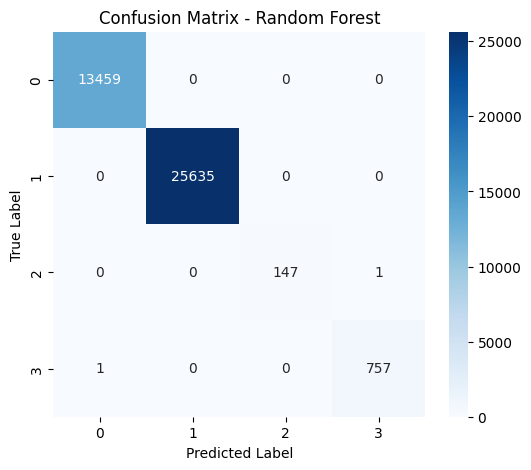

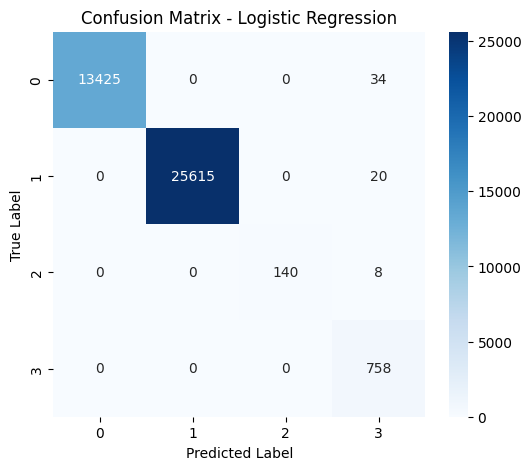

In [80]:
ploting_confusion_matrix(y_test, y_pred_ranfor_terbaik, "Random Forest")
ploting_confusion_matrix(y_test, y_pred_logres_terbaik, "Logistic Regression")

In [81]:
print("Report Random Forest Sebelum: ")
print(classification_report(y_test, y_pred_ranfor))

print("\nReport Random Forest Sesudah: ")
print(classification_report(y_test, y_pred_ranfor_terbaik))

Report Random Forest Sebelum: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13459
           1       1.00      1.00      1.00     25635
           2       1.00      0.99      1.00       148
           3       1.00      1.00      1.00       758

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000


Report Random Forest Sesudah: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13459
           1       1.00      1.00      1.00     25635
           2       1.00      0.99      1.00       148
           3       1.00      1.00      1.00       758

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



In [82]:
print("Report Logistic Regression Sebelum: ")
print(classification_report(y_test, y_pred_logreg))

print("\nReport Logistic Regression Sesudah: ")
print(classification_report(y_test, y_pred_logres_terbaik))

Report Logistic Regression Sebelum: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13459
           1       1.00      1.00      1.00     25635
           2       0.97      1.00      0.98       148
           3       0.89      0.99      0.94       758

    accuracy                           1.00     40000
   macro avg       0.96      1.00      0.98     40000
weighted avg       1.00      1.00      1.00     40000


Report Logistic Regression Sesudah: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13459
           1       1.00      1.00      1.00     25635
           2       1.00      0.95      0.97       148
           3       0.92      1.00      0.96       758

    accuracy                           1.00     40000
   macro avg       0.98      0.99      0.98     40000
weighted avg       1.00      1.00      1.00     40000



In [83]:
rf_cv_score = cross_val_score(randfor_tuning.best_estimator_, X_train, y_train, cv=3)
logreg_cv_score = cross_val_score(logreg_tuning.best_estimator_, X_train, y_train, cv=3)

print("Random Forest CV Score:", rf_cv_score.mean())
print("Logistic Regression CV Score:", logreg_cv_score.mean())

c:\Users\Nur Aria Hibnastiar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest CV Score: 0.9999750001953093
Logistic Regression CV Score: 0.9984937511326878


c:\Users\Nur Aria Hibnastiar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


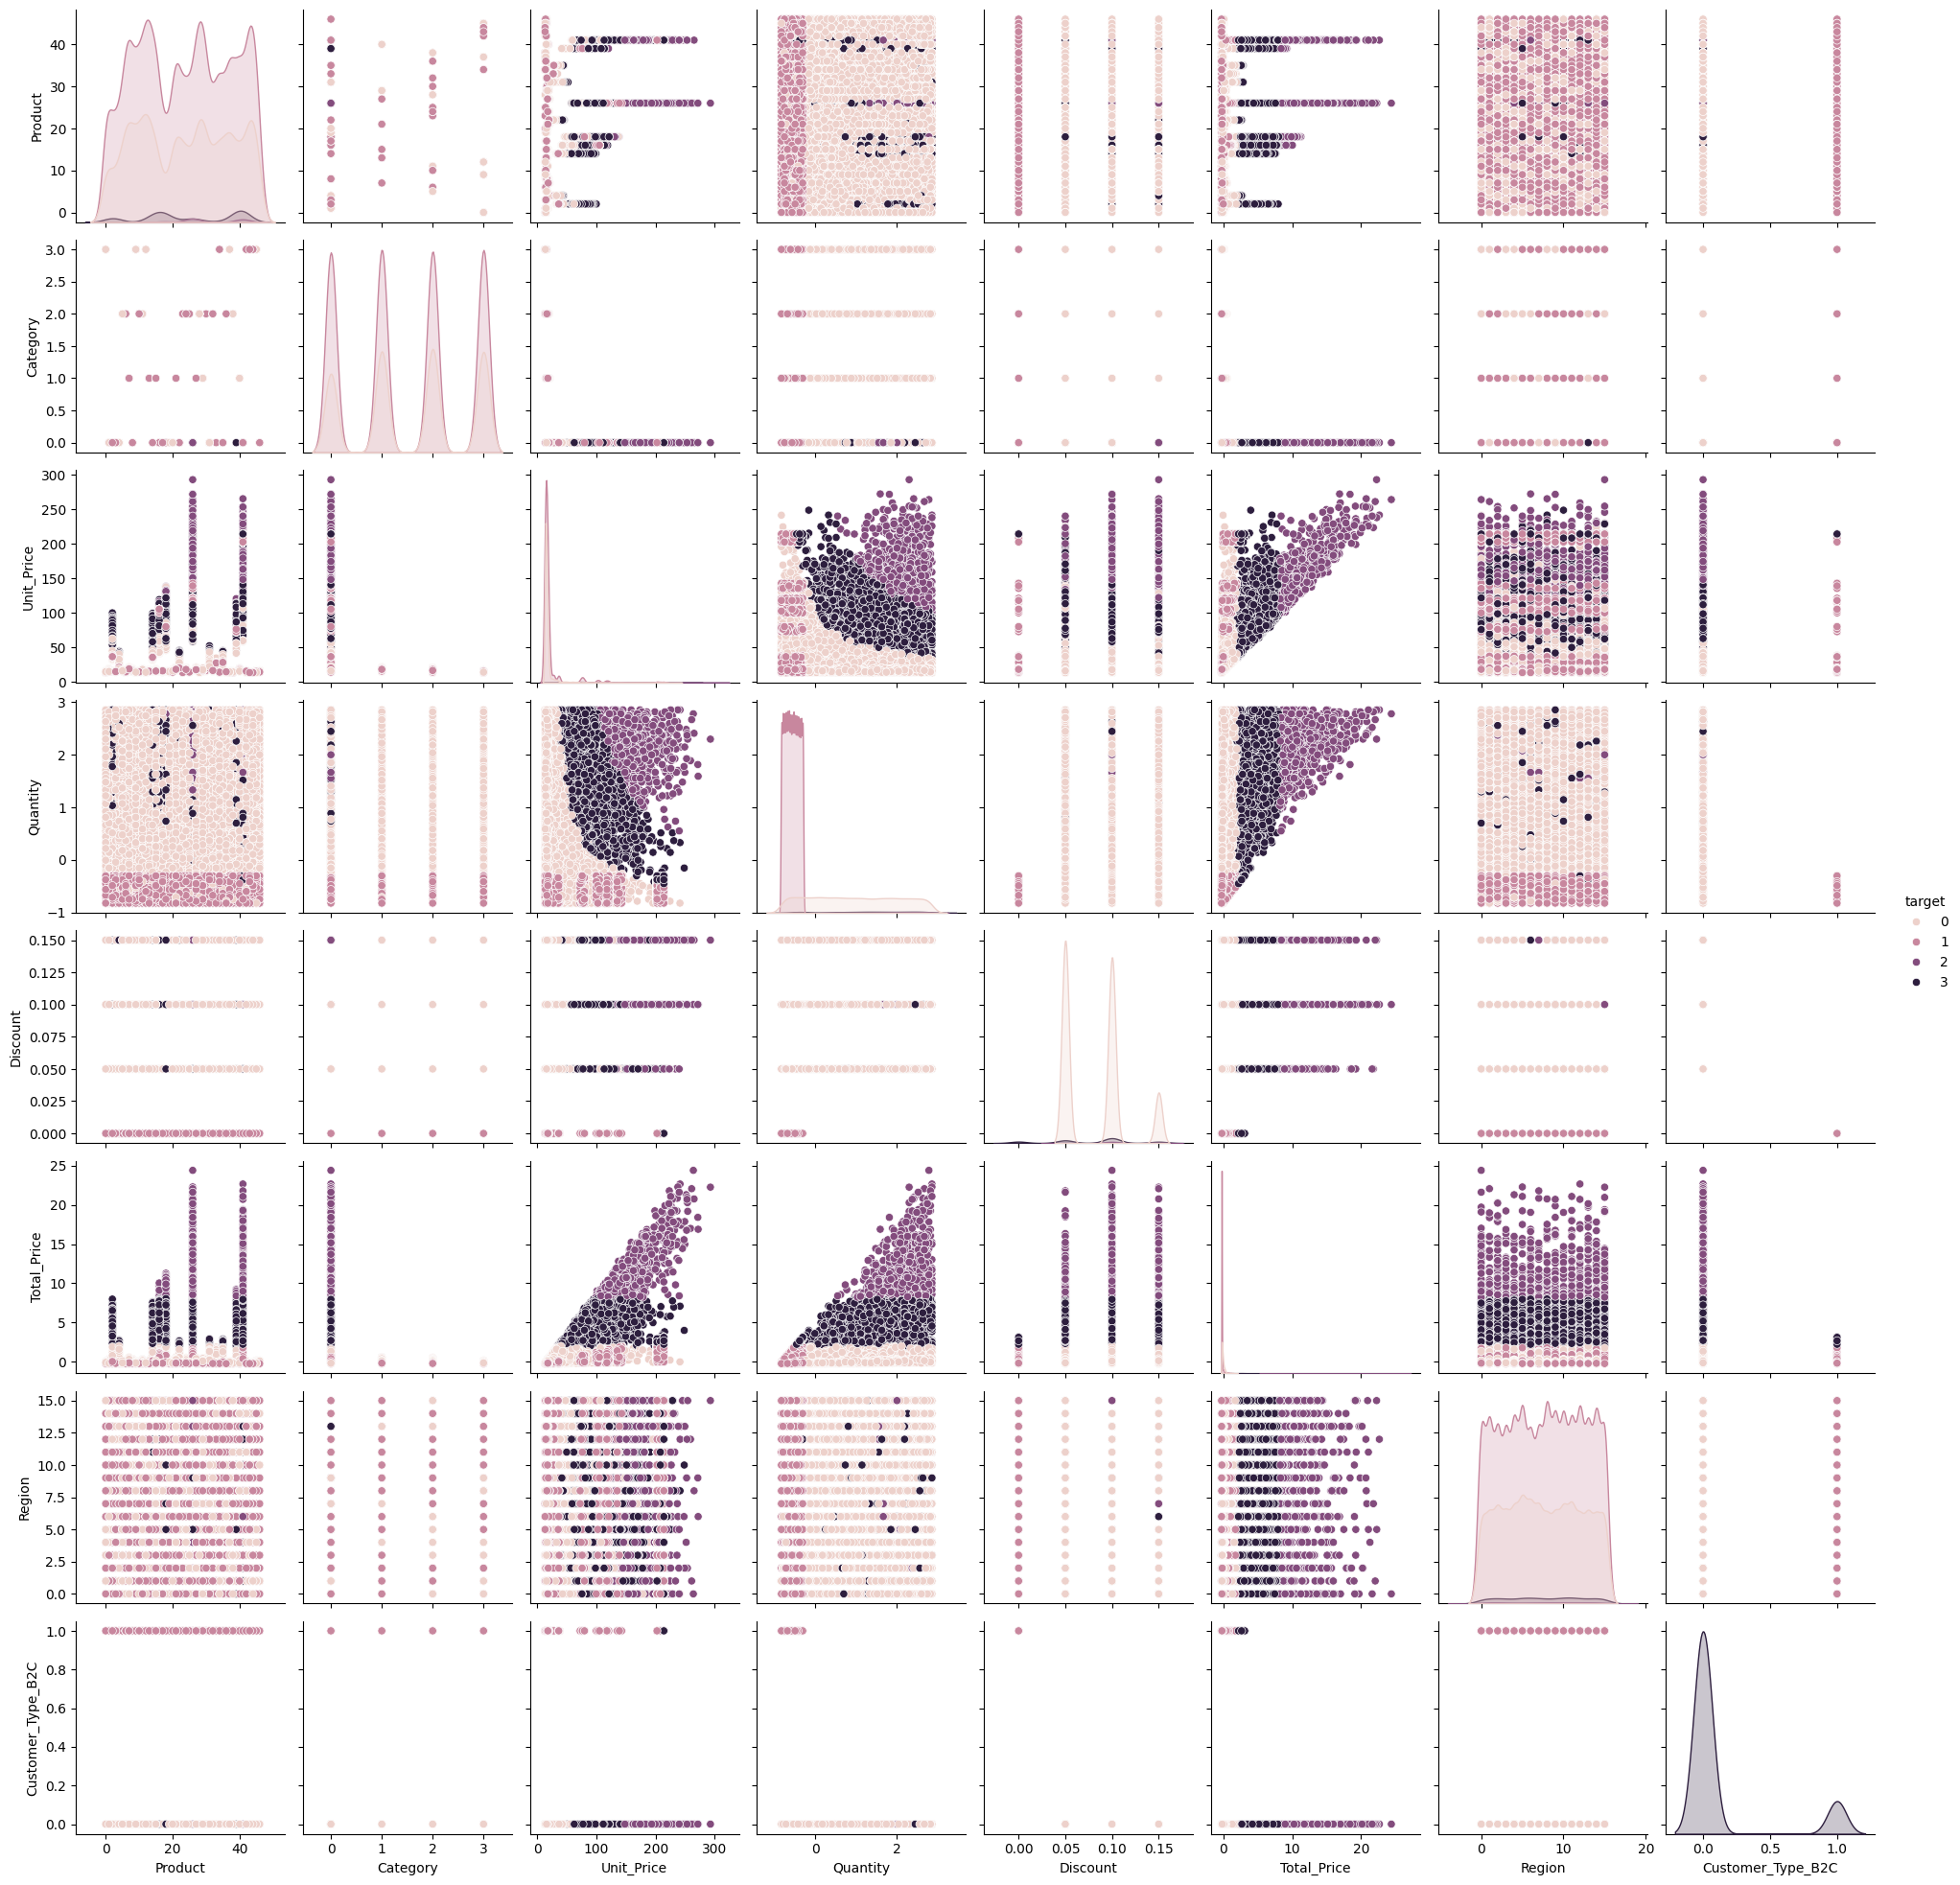

In [ ]:
df_train = pd.DataFrame(X_train)
df_train['target'] = y_train

sns.pairplot(df_train, hue='target')
plt.show()

In [85]:
df_train.corr()

,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Customer_Type_B2C,target
Product,1.000000,0.222183,0.077495,-0.000329,0.002192,0.031498,0.004070,-0.001487,0.009962
Category,0.222183,1.000000,-0.395955,0.001975,0.002032,-0.257517,0.002039,-0.001465,-0.143240
Unit_Price,0.077495,-0.395955,1.000000,0.015029,0.002222,0.621825,0.002087,0.010889,0.339306
Quantity,-0.000329,0.001975,0.015029,1.000000,0.822975,0.311952,-0.007600,-0.757749,-0.474391
Discount,0.002192,0.002032,0.002222,0.822975,1.000000,0.248169,-0.009529,-0.892162,-0.613315
Total_Price,0.031498,-0.257517,0.621825,0.311952,0.248169,1.000000,-0.000187,-0.219595,0.347501
Region,0.004070,0.002039,0.002087,-0.007600,-0.009529,-0.000187,1.000000,0.009699,0.010090
Customer_Type_B2C,-0.001487,-0.001465,0.010889,-0.757749,-0.892162,-0.219595,0.009699,1.000000,0.713223
target,0.009962,-0.143240,0.339306,-0.474391,-0.613315,0.347501,0.010090,0.713223,1.000000


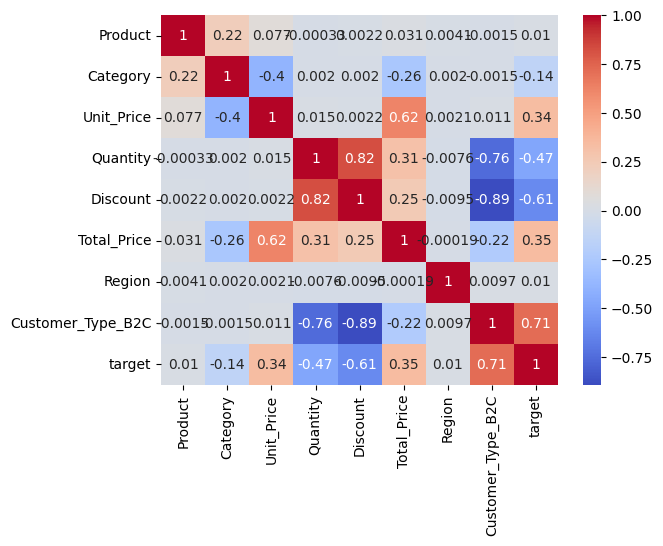

In [86]:
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [87]:
# accurasi score & f1 score harus diatas 92
print("Acc & F1 Score Random Forest Lama: ")
print(accuracy_score(y_test, y_pred_ranfor))
print(f1_score(y_test, y_pred_ranfor, average='macro'))

print("\nAcc & F1 Score Random Forest Terbaik: ")
print(accuracy_score(y_test, y_pred_ranfor_terbaik))
print(f1_score(y_test, y_pred_ranfor_terbaik, average='macro'))

print("\nAcc & F1 Score Logistic Regression Lama: ")
print(accuracy_score(y_test, y_pred_logreg))
print(f1_score(y_test, y_pred_logreg, average='macro'))

print("\nAcc & F1 Score Logistic Regression Terbaik: ")
print(accuracy_score(y_test, y_pred_logres_terbaik))
print(f1_score(y_test, y_pred_logres_terbaik, average='macro'))

Acc & F1 Score Random Forest Lama: 
0.99995
0.9988134399488302

Acc & F1 Score Random Forest Terbaik: 
0.99995
0.9988134399488302

Acc & F1 Score Logistic Regression Lama: 
0.9976
0.9802050208979666

Acc & F1 Score Logistic Regression Terbaik: 
0.99845
0.9828192611886438


In [88]:
df_train_no_target = df_train.drop('target', axis=1)

In [89]:
# Ambil nama fitur dari X_train (pastikan X_train adalah DataFrame)
feature_names = df_train_no_target.columns

# Ambil feature importance dari model terbaik
importances_ranfor = randfor_tuning.best_estimator_.feature_importances_
importances_logreg = logreg_tuning.best_estimator_.coef_[0]

# Bikin DataFrame biar rapi
feature_import_ranfor = pd.DataFrame({'Feature': feature_names, 'Importance': importances_ranfor})
feature_import_logreg = pd.DataFrame({'Feature': feature_names, 'Importance': importances_logreg})

# Urutkan berdasarkan kepentingan fitur
feature_import_ranfor = feature_import_ranfor.sort_values(by='Importance', ascending=False)
feature_import_logreg = feature_import_logreg.sort_values(by='Importance', ascending=False)

In [90]:
feature_import_ranfor

,Feature,Importance
4,Discount,0.341023
7,Customer_Type_B2C,0.315750
3,Quantity,0.194374
5,Total_Price,0.111182
2,Unit_Price,0.030075
1,Category,0.005492
0,Product,0.001951
6,Region,0.000153


In [91]:
feature_import_logreg

,Feature,Importance
4,Discount,2.769258
3,Quantity,0.428003
2,Unit_Price,0.016923
0,Product,0.000754
6,Region,0.000271
1,Category,-0.533096
5,Total_Price,-8.194865
7,Customer_Type_B2C,-29.206456


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
   - Precision atau Recall rendah untuk kelas tertentu.
   - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### 1. Perbandingan evaluasi after dan before tunning

In [95]:
# Menghitung metrik untuk Logistic Regression (setelah tuning)
acc_logreg_terbaik = accuracy_score(y_test, y_pred_logres_terbaik)
precision_log_terbaik = precision_score(y_test, y_pred_logres_terbaik, average='weighted')
recall_log_terbaik = recall_score(y_test, y_pred_logres_terbaik, average='weighted')
f1_log_terbaik = f1_score(y_test, y_pred_logres_terbaik, average='weighted')

# Menghitung metrik untuk Random Forest (setelah tuning)
acc_ranfor_terbaik = accuracy_score(y_test, y_pred_ranfor_terbaik)
precision_ranfor_terbaik = precision_score(y_test, y_pred_ranfor_terbaik, average='weighted')
recall_ranfor_terbaik = recall_score(y_test, y_pred_ranfor_terbaik, average='weighted')
f1_ranfor_terbaik = f1_score(y_test, y_pred_ranfor_terbaik, average='weighted')

# DataFrame untuk hasil evaluasi sebelum dan setelah tuning
data = {
  "Model": [
    "Random Forest (Sebelum Tuning)", "Logistic Regression (Sebelum Tuning)",
    "Random Forest (Setelah Tuning)", "Logistic Regression (Setelah Tuning)"
  ],
  "Akurasi": [acc_ranfor, acc_logress, acc_ranfor_terbaik, acc_logreg_terbaik],
  "Presisi": [precision_ranfor, precision_log, precision_ranfor_terbaik, precision_log_terbaik],
  "Recall": [recall_ranfor, recall_log, recall_ranfor_terbaik, recall_log_terbaik],
  "F1-Score": [f1_ranfor, f1_log, f1_ranfor_terbaik, f1_log_terbaik]
}

df_performance = pd.DataFrame(data)
df_performance


,Model,Akurasi,Presisi,Recall,F1-Score
0,Random Forest (Sebelum Tuning),0.99995,0.999950,0.99995,0.999950
1,Logistic Regression (Sebelum Tuning),0.99760,0.997836,0.99760,0.997664
2,Random Forest (Setelah Tuning),0.99995,0.999950,0.99995,0.999950
3,Logistic Regression (Setelah Tuning),0.99845,0.998567,0.99845,0.998477


### 2. Identifikasi Kelemahan Model

Berdasarkan hasil evaluasi:

#### **a. Analisis Performa Model**
- **Random Forest**:
  - **Sebelum & Sesudah Tuning**: Tidak ada perubahan signifikan pada metrik (Akurasi, Presisi, Recall, F1-Score = ~0.99995). 
  - **Kemungkinan Kelemahan**: 
    - Model mungkin sudah optimal sejak awal, sehingga tuning tidak memberikan peningkatan.
    - Perlu analisis lebih lanjut dikarenakan terdapat indikasi **overfitting** dimana akurasinya mendekati 100%

- **Logistic Regression**:
  - **Setelah Tuning**: Peningkatan kecil pada akurasi (0.99760 → 0.99845) dan F1-Score (0.997664 → 0.998477).
  - **Kemungkinan Kelemahan**:
    - Peningkatan relatif kecil menunjukkan model sudah mendekati batas performa maksimal.

#### **b. Potensi Masalah Umum**
- **Kelas Tidak Seimbang**: Meskipun metrik tinggi, jika dataset memiliki kelas dominan, model mungkin hanya memprediksi kelas mayoritas. Perlu verifikasi **presisi/recall per kelas**.
- **Overfitting**: Overfitting mungkin terjadi jika performa train jauh lebih tinggi daripada test set (data tidak ditampilkan).

### 3. Rekomendasi

#### **a. Jika Hasil Dianggap Memuaskan**
- **Tidak diperlukan tindakan lanjutan** karena model sudah mencapai performa maksimal (akurasi ~99.9%).
- **Pastikan validasi**:
  - Periksa apakah data train dan test terpisah dengan benar (hindari data leakage).
  - Verifikasi apakah kelas dalam dataset seimbang.

#### **b. Jika Ingin Meningkatkan Lebih Lanjut**
1. **Analisis Per Kelas**:
   - Hitung presisi, recall, dan F1-Score untuk setiap kelas untuk memastikan tidak ada kelas minoritas yang terabaikan.
2. **Eksplorasi Algoritma Lain**:
   - Coba algoritma seperti **Gradient Boosting (XGBoost/LightGBM)** atau **Neural Networks** untuk benchmarking.
3. **Optimasi Data**:
   - Jika kelas tidak seimbang, lakukan **resampling** (oversampling/undersampling) atau gunakan teknik **SMOTE**.
   - Kumpulkan data tambahan untuk kelas dengan presisi/recall rendah.
4. **Hyperparameter Tuning Lanjutan**:
   - Untuk Logistic Regression, eksplorasi kombinasi hyperparameter seperti `C`, `penalty`, atau `solver`.
   - Untuk Random Forest, coba tuning parameter seperti `max_depth` atau `min_samples_split` dengan range yang lebih luas.

#### **c. Deployment**
- Jika hasil validasi memuaskan, model dapat langsung di-deploy.
- Pantau performa model secara berkala di lingkungan produksi untuk deteksi drift data atau penurunan performa.